[![https://gyazo.com/4c20b38b3c25155465c9a9a1440c47b2](https://i.gyazo.com/4c20b38b3c25155465c9a9a1440c47b2.png)](https://gyazo.com/4c20b38b3c25155465c9a9a1440c47b2)



##  INDIVIDUAL PROJECT - Predict Credit Card Default


## Data Exploration & Cleaning

                                                           Pau Roger Puig-Sureda
                                                           08/06/2018

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import Train data

In [3]:
train_Total = pd.read_csv('challengeTrain.csv')
train_Total.head(3)

,customerID,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
0,D_00046780637,Female,Single,23.0,373.0,0,0,0,1,1,"[1000,1300)",NaN,NaN,External Agent,0,Normal,1173.46,1
1,D_00043828980,Male,Single,27.0,702.0,1,0,0,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Restructuring,0.00,0
2,D_00043396577,Male,Single,28.0,728.0,0,0,0,1,0,"[1500,2000)",2.0,0.0,External Agent,0,Restructuring,0.00,1


In [4]:
train_Total.shape

(522939, 18)

### Take only a subset for speed purposes

To do quicker parameter tunning on the different models, I opted to take a sample of around 10% of the instances.

In [5]:
train = train_Total#.head(50000)

### Visualization: Variables vs Target

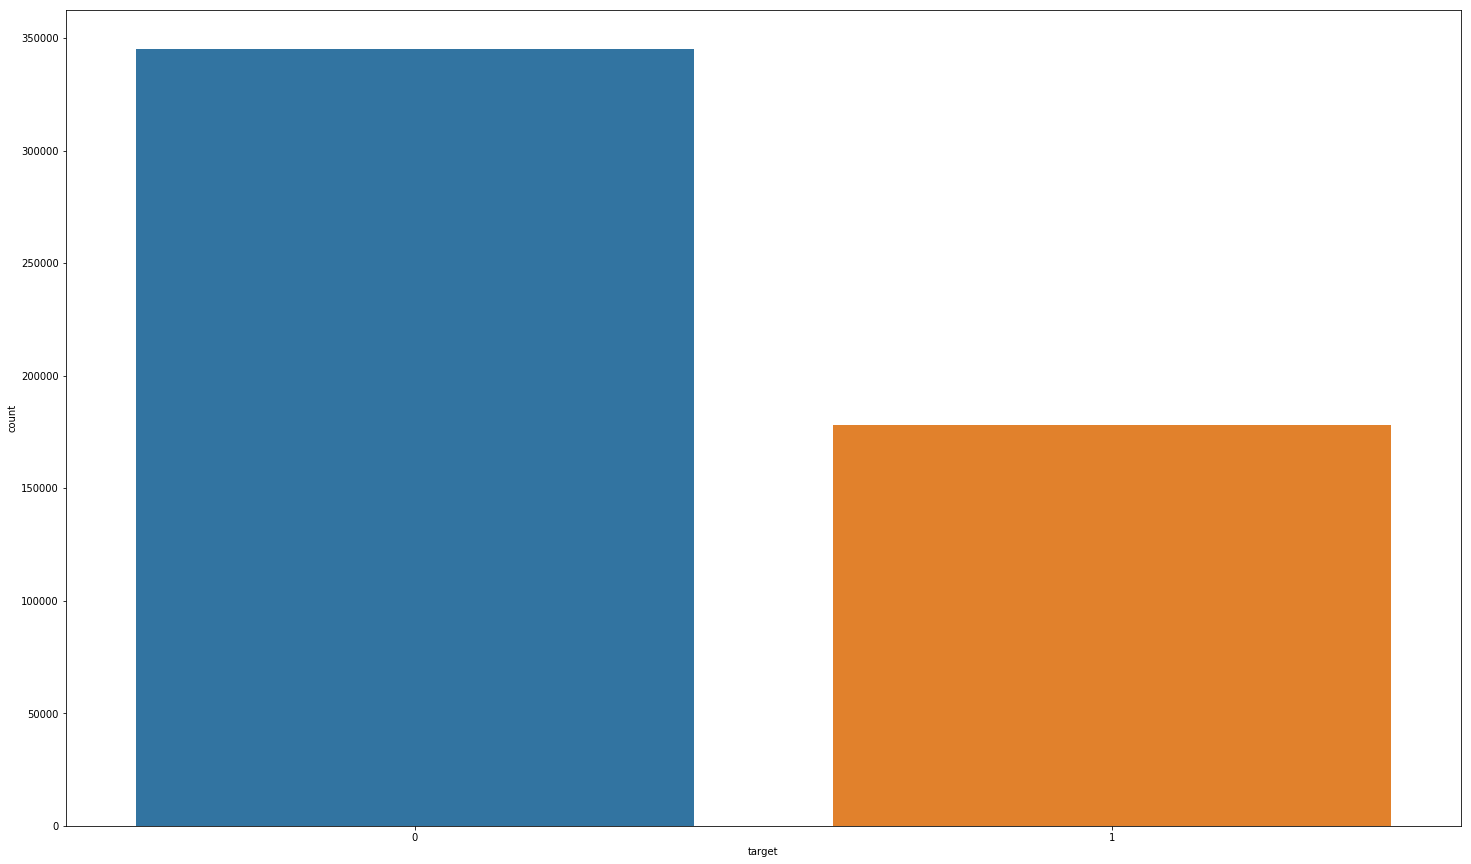

In [6]:
plt.figure(figsize=(25,15))
sns.countplot(train["target"]);

In [7]:
Counter(train['target'])

Counter({1: 177938, 0: 345001})

This means that a model that would say clients will not churn, would get it right **66%** of the time. Hence, for my machine learning to provide valuable information, it has to output better results.

In [8]:
train.corr()

,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,numLoans,numMortgages,indBadLocation,sumExternalDefault,target
age,1.000000,0.331426,0.212002,0.034850,0.026077,-0.060288,-0.047110,0.074870,0.013078,0.010903,0.008358,-0.089086
externalScore,0.331426,1.000000,0.106317,-0.049370,-0.217069,0.018792,-0.492729,0.074626,0.107768,-0.039955,-0.068143,-0.223701
indSimin,0.212002,0.106317,1.000000,-0.078886,-0.005982,0.137329,-0.023332,0.054658,0.005521,0.011073,-0.001204,-0.081625
indXlist,0.034850,-0.049370,-0.078886,1.000000,0.024611,-0.442318,0.023786,-0.038203,-0.027999,0.018933,0.004243,0.062213
indCreditBureau,0.026077,-0.217069,-0.005982,0.024611,1.000000,-0.011831,0.169119,-0.098194,-0.018536,-0.013597,0.063071,0.046824
indInternet,-0.060288,0.018792,0.137329,-0.442318,-0.011831,1.000000,-0.002633,0.038640,0.014409,-0.004749,-0.003929,-0.064515
indBadDebt,-0.047110,-0.492729,-0.023332,0.023786,0.169119,-0.002633,1.000000,-0.084328,-0.058628,0.055464,0.069402,0.148744
numLoans,0.074870,0.074626,0.054658,-0.038203,-0.098194,0.038640,-0.084328,1.000000,0.072303,-0.000760,-0.013499,-0.119378
numMortgages,0.013078,0.107768,0.005521,-0.027999,-0.018536,0.014409,-0.058628,0.072303,1.000000,-0.043736,-0.000142,-0.089136
indBadLocation,0.010903,-0.039955,0.011073,0.018933,-0.013597,-0.004749,0.055464,-0.000760,-0.043736,1.000000,0.002456,0.081940


### Import Test data

Printing the first three rows. 

In [10]:
test = pd.read_csv('challengeTest.csv')
test.head(3)

,customerID,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault
0,D_00044539972,Female,Single,26.0,510.0,0,0,0,1,0,"[1300,1500)",NaN,NaN,Call Center,0,Normal,0.0
1,D_00074041049,Female,Single,20.0,739.0,0,0,0,1,0,<650,NaN,NaN,External Agent,0,Normal,0.0
2,D_00041998439,Male,Single,63.0,893.0,0,0,0,0,0,"[1300,1500)",1.0,0.0,Branch,0,Default,0.0


In [11]:
test.shape

(174313, 17)

### Join Datasets

So that I only have to do transformations once. I will split them again before the modelling part.

In [12]:
data = train.append(pd.DataFrame(data = test), ignore_index=True)
data.shape

(697252, 18)

In [13]:
data.head(3)

,age,channel,customerID,externalScore,indBadDebt,indBadLocation,indCreditBureau,indInternet,indSimin,indXlist,numLoans,numMortgages,previous,salary,sex,status,sumExternalDefault,target
0,23.0,External Agent,D_00046780637,373.0,1,0,0,1,0,0,NaN,NaN,Normal,"[1000,1300)",Female,Single,1173.46,1.0
1,27.0,External Agent,D_00043828980,702.0,0,0,0,1,1,0,1.0,0.0,Restructuring,"[1500,2000)",Male,Single,0.00,0.0
2,28.0,External Agent,D_00043396577,728.0,0,0,0,1,0,0,2.0,0.0,Restructuring,"[1500,2000)",Male,Single,0.00,1.0


### Variable explanation

**customerID** - Client unique identification - character

**sex** - Sex (Female, Male) - factor

**status** - Marital Status (Divorced,Married,Single,Unknown,Widower) - factor

**age** -  in years - numeric

**externalScore** - A score provided by third party about the risk of default - numeric

**indSimin** - A binary variable that indicates if the client has guarantors - binary

**indXlist** - A binary variable that indicates if the client has debts with official agencies published 
in public registers - binary

**indCreditBureau** - A binary variable that indicates if the client appears in the delinquency list Credit Bureau - binary

**indInternet** - A binary variable that indicates if the client ask for information about credit cards online - binary

**indBadDebt** -  A binary variable that indicates whether the actual debt is classified as sub-standard or lower-quality risk

**salary** - Salary in intervals (None , <650 , [650,1000) , [1000,1300) , [1300,1500) , [1500,2000) , [2000,3000) , [3000,5000), [5000,8000) , >8000 , Unknown) - factor

**numLoans** - Number of active loans that the client has in the bank - numeric

**numMortgages** - Number of active mortgages that the client has in the bank - numeric

**channel** - Channel for which the credit card has been contracted (App, Branch,Call Center, External, Agent,Online, Recovery, Unknown) - factor

**indBadLocation** - A binary varible indicanting if the client's adress is located in a low rent per capita zone - binary

**previous** - client debt classification of the previous year (Default, Normal, Refinancing, Restructuring, Unpaid) - factor

**sumExternalDefault** - The amount of money that the client's debs that are in default - numeric

**target** - A binary variable that indicates that the credit card fee has been unpaid - binary

### Checking NA's

In [14]:
data.isnull().sum()

age                    30173
channel                    0
customerID                 0
externalScore          11070
indBadDebt                 0
indBadLocation             0
indCreditBureau            0
indInternet                0
indSimin                   0
indXlist                   0
numLoans              340980
numMortgages          340980
previous                   0
salary                     0
sex                        0
status                     0
sumExternalDefault      3554
target                174313
dtype: int64

#### NumLoans and numMortgages

NA in '**numLoans**' and '**numMortages**' probably means 'Unknown' Loan/Mortage requested with our bank.

In [15]:
data['numLoans'] = data['numLoans'].fillna('Unknown')
data['numMortgages'] = data['numMortgages'].fillna('Unknown')

In [16]:
Counter(data['numLoans'])

Counter({'Unknown': 340980,
         1.0: 121247,
         2.0: 61166,
         4.0: 13645,
         0.0: 122472,
         3.0: 30813,
         5.0: 5037,
         6.0: 1483,
         9.0: 10,
         7.0: 327,
         8.0: 70,
         14.0: 1,
         11.0: 1})

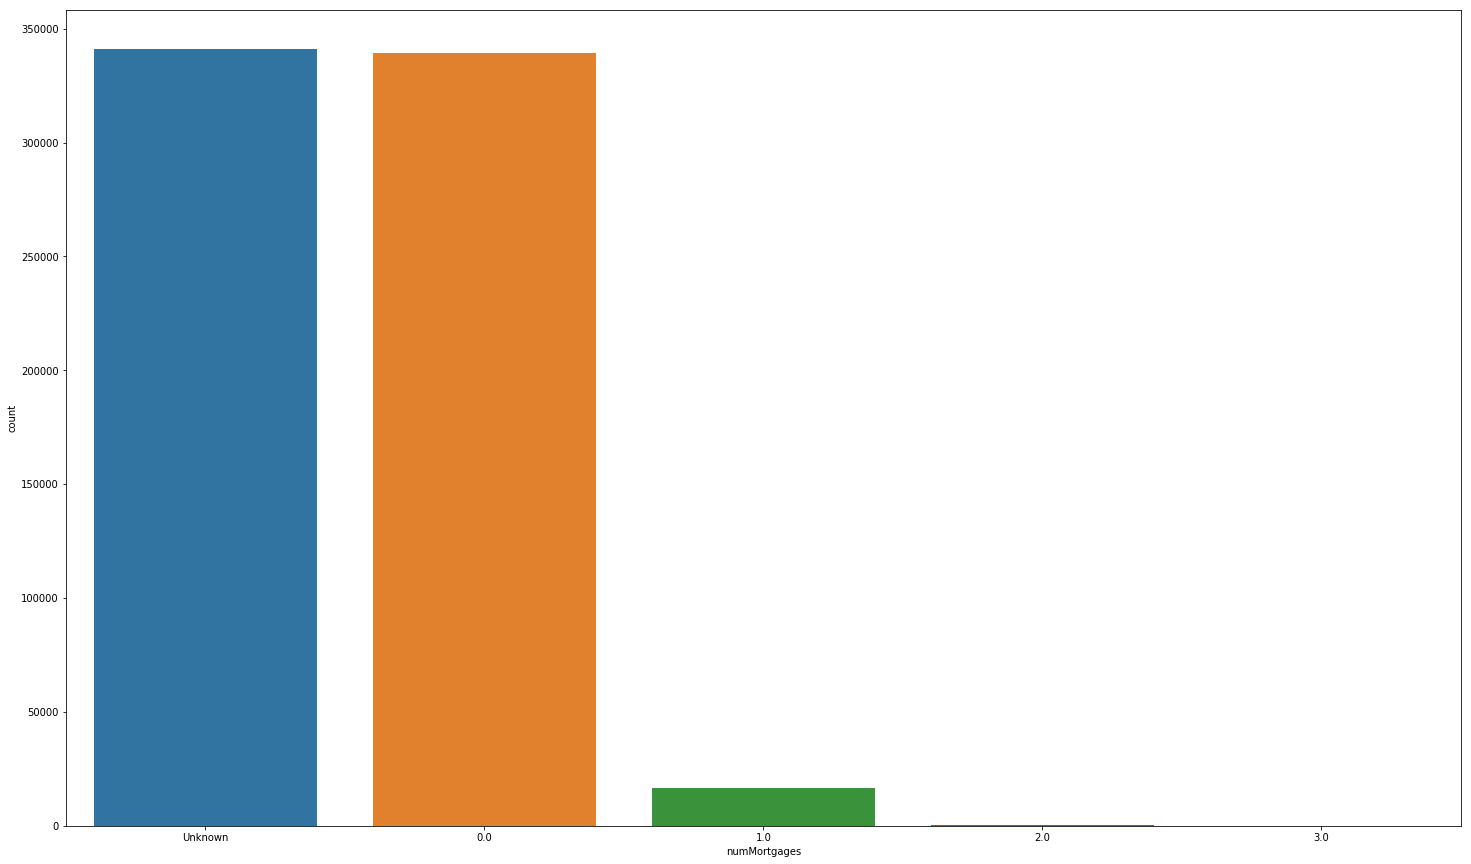

In [17]:
plt.figure(figsize=(25,15))
sns.countplot(data['numMortgages']);

In [18]:
Counter(data['numMortgages'])

Counter({'Unknown': 340980, 0.0: 339369, 1.0: 16568, 2.0: 325, 3.0: 10})

I will try to add both variables into one called **num_products**. However, it did not improve my model.

In [19]:
#data['num_products'] = data['numLoans'] + data['numMortgages']

#### External Score

NA in 'externalScore' is likely the unavailability of such score.

In [20]:
data['externalScore'].describe()

count    686182.000000
mean        591.354566
std         261.821559
min           1.000000
25%         458.000000
50%         649.000000
75%         791.000000
max         995.000000
Name: externalScore, dtype: float64

In [21]:
# Initially I assigned the median to the NA's
# data['externalScore'] = data['externalScore'].fillna(649)

**df** is a new datafreame in which only the rows in which **externalScore** is null.

In [22]:
df = data[data['externalScore'].isnull()]
df.shape

(11070, 18)

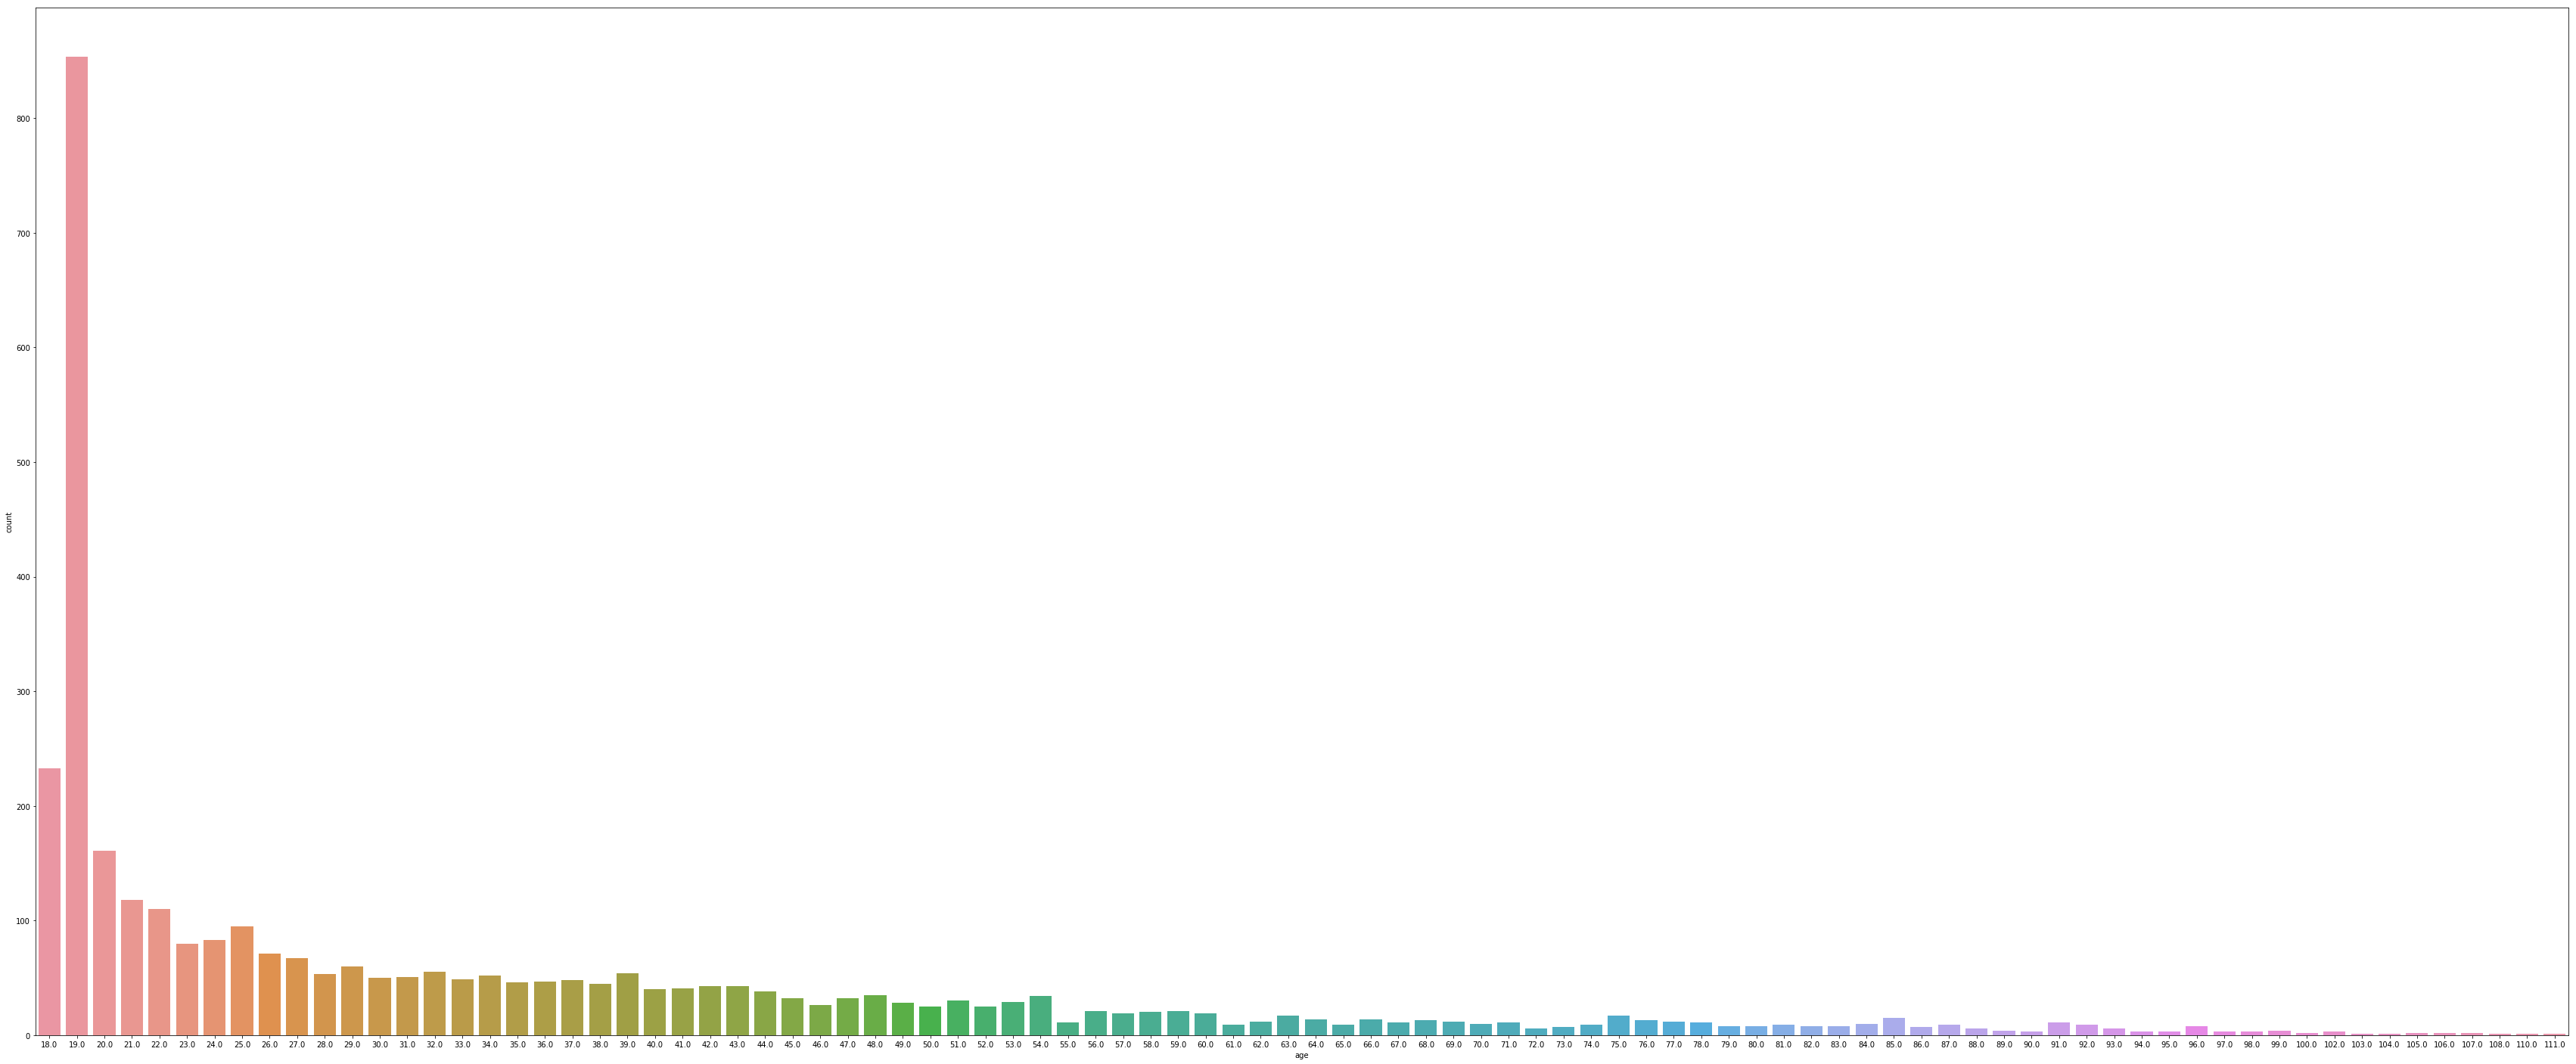

In [23]:
plt.figure(figsize=(60,25))
sns.countplot(df['age']);

As it turns out, most of the NA's in the 'externalScore' variable belong to young customers. 

The external score is not inmediate, it takes a while after the customer has an account set up that he/she is provided with an score. Hence, that is the reason such NA's are in place.

The Credit Score ranges from 0 to 1000. In order to account for 'No_Score' as well as 'Score', I will proceed to bin the variable. Some research provided me different options of binning, such as:

Excellent (720+) OR (750+)

Good (640-719) OR (700-749)

Fair (550-639) OR (650-699)

Poor (500-549) OR (550-649)

Very Poor (0-499) OR (1-549)

In [24]:
df1 = data[data['externalScore'].notnull()]
df1.shape

(686182, 18)

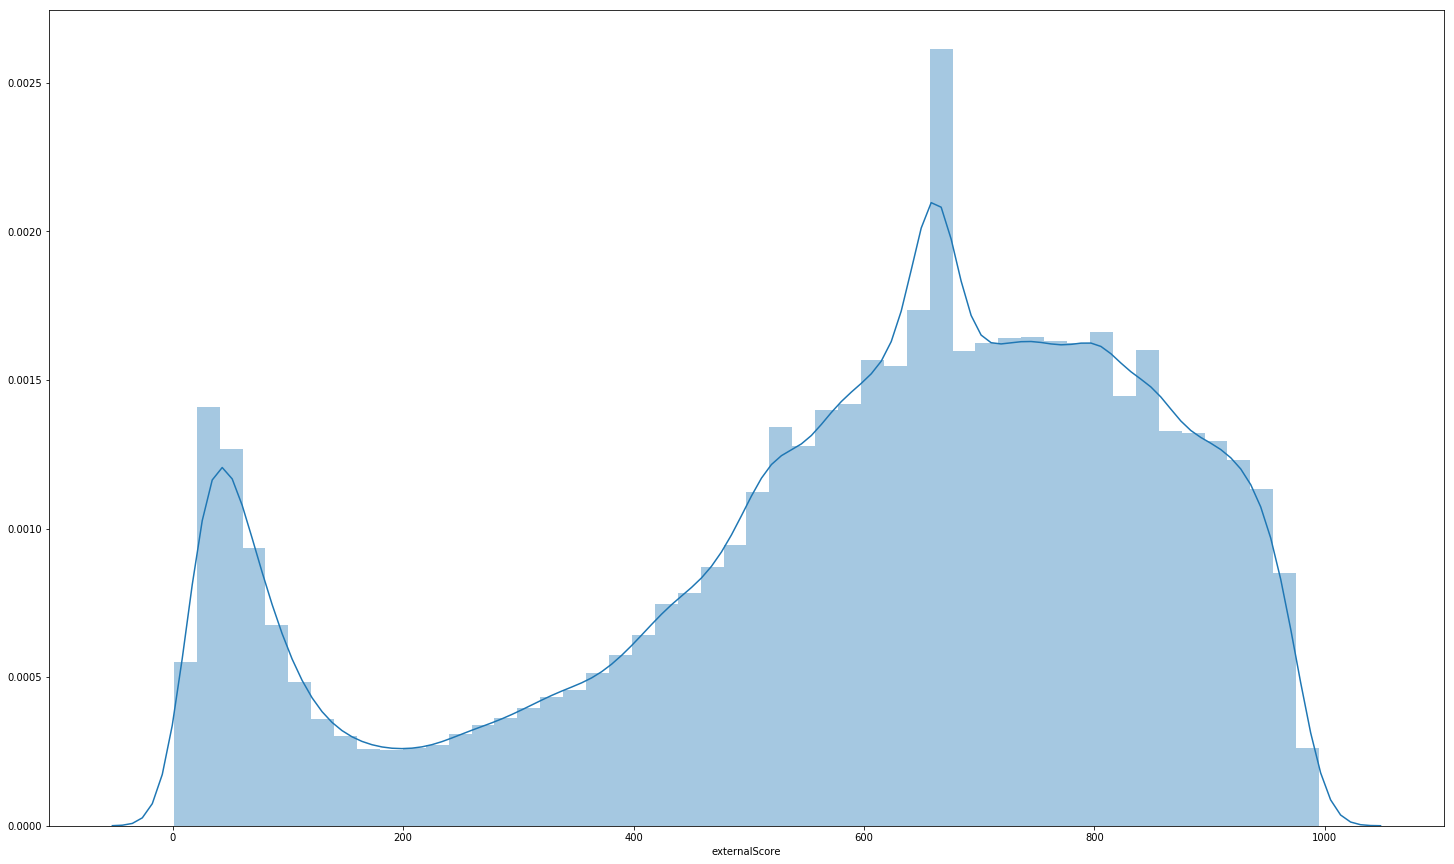

In [25]:
plt.figure(figsize=(25,15))
sns.distplot(df1['externalScore']);

Based on the distribution above, I came up with the following categorization of the variable.

In [26]:
data['binned_externalScore'] = pd.cut(data['externalScore'], [0.25, 190, 440, 620, 850, 1000], labels=[0,1,2,3,4])
data['binned_externalScore'].describe()

count     686182
unique         5
top            3
freq      268266
Name: binned_externalScore, dtype: int64

In [27]:
data['binned_externalScore'] = data['binned_externalScore'].astype('float')
data['binned_externalScore'].describe()

count    686182.000000
mean          2.342087
std           1.232601
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: binned_externalScore, dtype: float64

I fill in the NA-s with the most likely factor.

In [28]:
data['binned_externalScore'] = data['binned_externalScore'].fillna('Unknown')
data['binned_externalScore'].describe()

count     697252.0
unique         6.0
top            3.0
freq      268266.0
Name: binned_externalScore, dtype: float64

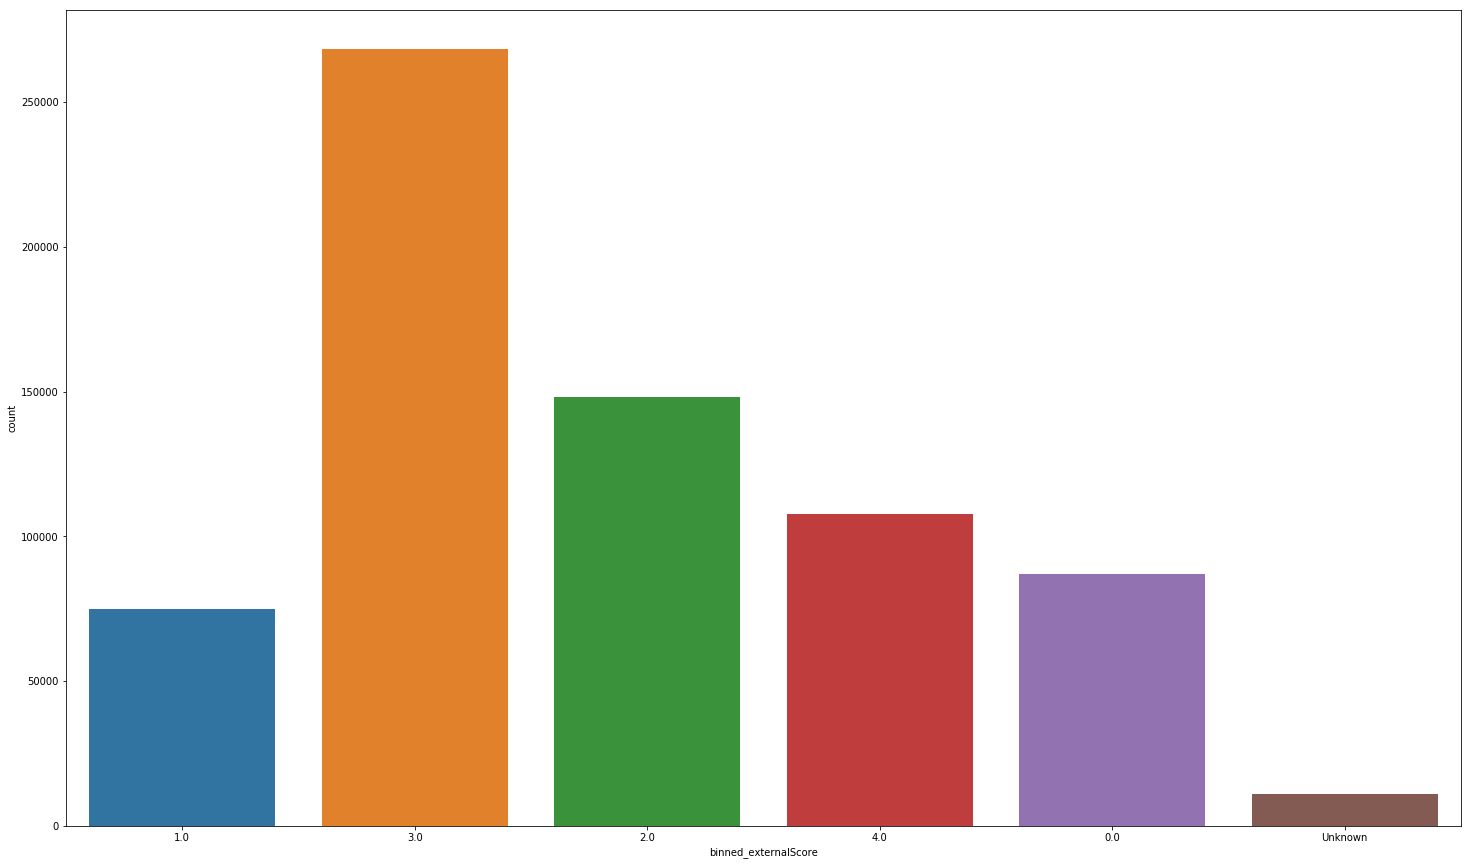

In [29]:
plt.figure(figsize=(25,15))
sns.countplot(data['binned_externalScore']);

In [30]:
Counter(data['binned_externalScore'])

Counter({1.0: 75008,
         3.0: 268266,
         2.0: 148022,
         4.0: 107812,
         0.0: 87074,
         'Unknown': 11070})

#### External Default

Amount of debt that has NOT been paid. It is likely that an NA here means that th client has NO debt with the bank, else they would know about it.

In [31]:
data['sumExternalDefault'].describe()

count    6.936980e+05
mean     4.791325e+02
std      9.714160e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.441000e+01
max      6.021214e+06
Name: sumExternalDefault, dtype: float64

To graph the distribution, i create a data frame (**df2**) with only the not null values of this feature.

In [32]:
df2 = data[data['sumExternalDefault'].notnull()]
df2.shape

(693698, 19)

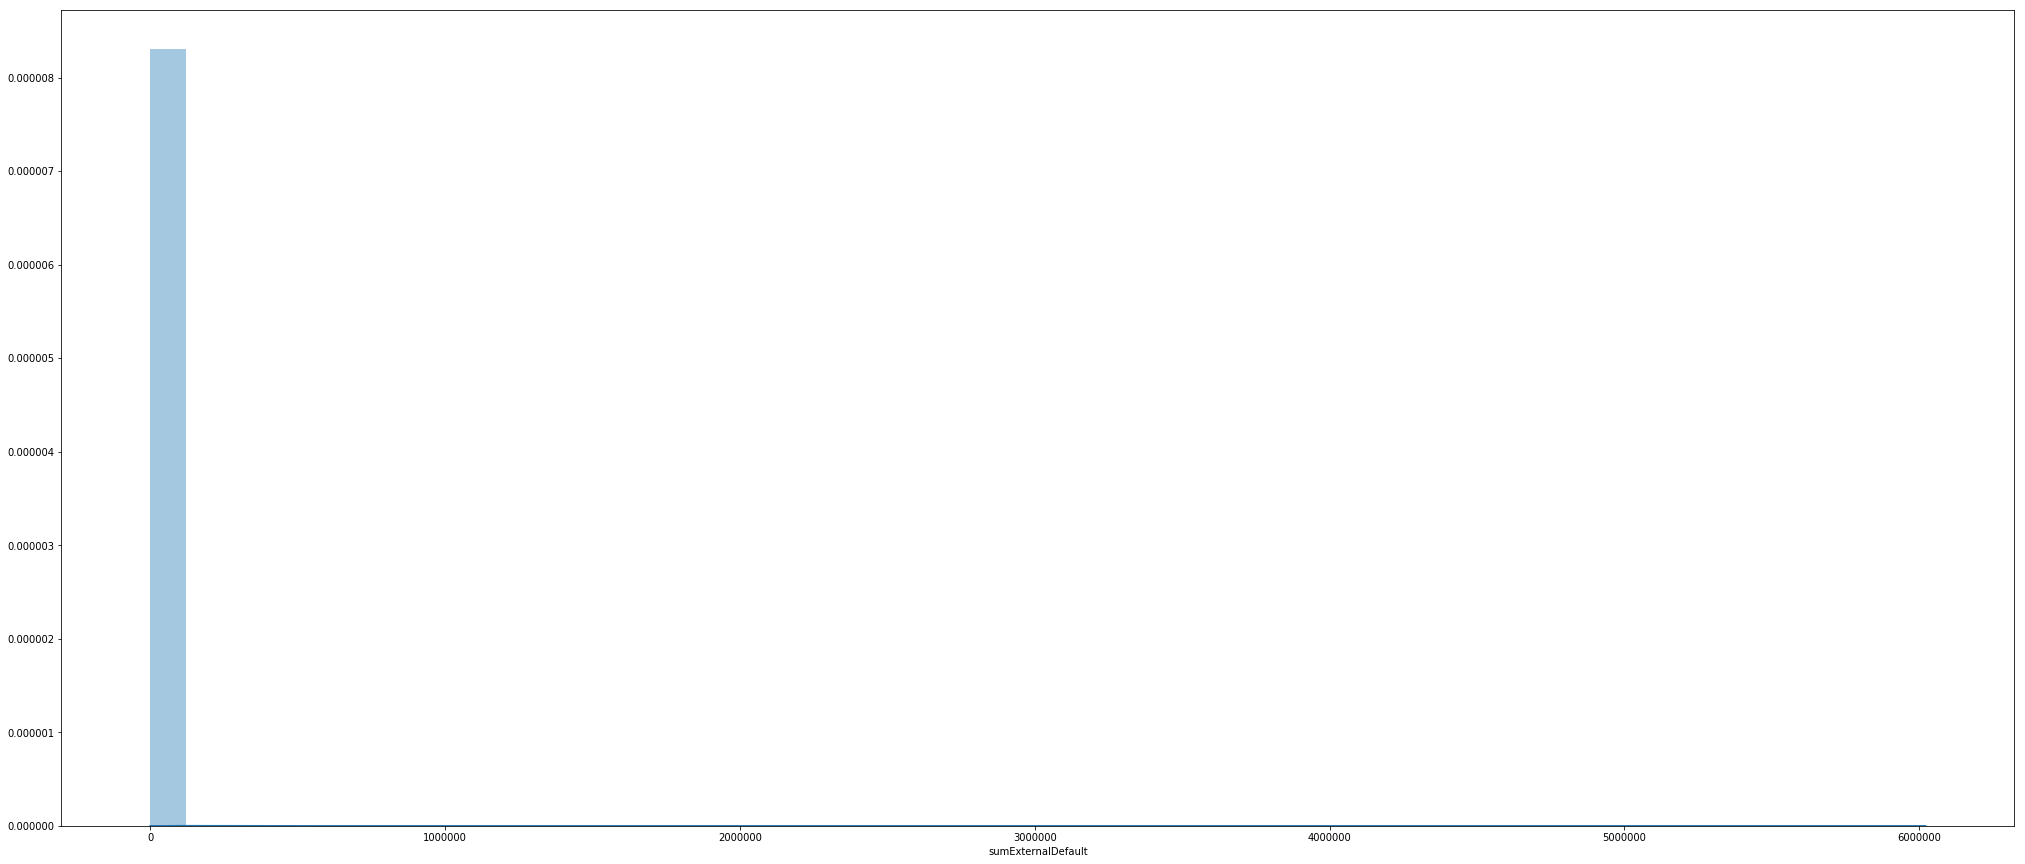

In [33]:
plt.figure(figsize=(35,15))
sns.distplot(df2['sumExternalDefault']);

It is a very long tail. Perhaps a categorical variable that states 'None'/'Good', 'Regular' and 'Bad' is the best approach.

I am chosing to set up the boundry between 'Regular' and 'Bad' to 5000€ of unpayed debt.

I am assigning the highest score to those people that have debt but payed it all, because those are the most likely to pay as well the credit card debt.

In [34]:
data['binned_ExternalDefault'] = pd.cut(data['sumExternalDefault'], [-1, 0, 5000, 10000000], labels=[3,1,0])
data['binned_ExternalDefault'].describe()

count     693698
unique         3
top            3
freq      490965
Name: binned_ExternalDefault, dtype: int64

In [35]:
data['binned_ExternalDefault'] = data['binned_ExternalDefault'].astype('float')
data['binned_ExternalDefault'].describe()

count    693698.000000
mean          2.396272
std           0.949029
min           0.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: binned_ExternalDefault, dtype: float64

Next, I will fill the null values with the category **0**.

In [36]:
data['binned_ExternalDefault'] = data['binned_ExternalDefault'].fillna(0)
data['binned_ExternalDefault'].describe()

count    697252.000000
mean          2.384058
std           0.961865
min           0.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: binned_ExternalDefault, dtype: float64

In [37]:
data['binned_ExternalDefault'].isnull().sum()

0

In [38]:
data.isnull().sum()

age                        30173
channel                        0
customerID                     0
externalScore              11070
indBadDebt                     0
indBadLocation                 0
indCreditBureau                0
indInternet                    0
indSimin                       0
indXlist                       0
numLoans                       0
numMortgages                   0
previous                       0
salary                         0
sex                            0
status                         0
sumExternalDefault          3554
target                    174313
binned_externalScore           0
binned_ExternalDefault         0
dtype: int64

#### Age

In [39]:
data['age'].describe()

count    667079.000000
mean         39.088333
std          13.943430
min          18.000000
25%          28.000000
50%          37.000000
75%          48.000000
max         111.000000
Name: age, dtype: float64

INITYALLY i will input the median

In [40]:
#data['age'] = data['age'].fillna(37)

As I saw before, most people with no **external score** are very young, so I will input the NA's in the following way:

First, I'll create the dataframe 'No Credit Score' (**df_NoCS**) and input to the NA values the median of this segment.

In [41]:
df_NoCS = data[data['binned_externalScore'] == 'Unknown']
df_NoCS.shape

(11070, 20)

In [42]:
df_NoCS['age'].isnull().sum()

7608

In [43]:
df_NoCS['age'].describe()

count    3462.000000
mean       33.826979
std        19.178983
min        18.000000
25%        19.000000
50%        25.000000
75%        42.000000
max       111.000000
Name: age, dtype: float64

In [44]:
data['age'][data['binned_externalScore'] == 'Unknown'].count()

3462

In [45]:
data['age'][data['binned_externalScore'] == 'Unknown'] = data['age'].fillna(25)

In [46]:
data['age'].describe()

count    674687.000000
mean         38.929468
std          13.944168
min          18.000000
25%          28.000000
50%          36.000000
75%          47.000000
max         111.000000
Name: age, dtype: float64

In [47]:
data['age'].isnull().sum()

22565

Second, i will look to input the remaining NA's in the variable **Age** depending on the salary of the person.

In [48]:
Counter(data['salary'])

Counter({'[1000,1300)': 349734,
         '[1500,2000)': 79699,
         '[650,1000)': 71473,
         '[2000,3000)': 50983,
         '[1300,1500)': 75020,
         '>8000': 4097,
         '[3000,5000)': 22538,
         '<650': 26210,
         '[5000,8000)': 9594,
         'Unknown': 3237,
         'None': 4667})

In [49]:
df_Salary = data[data['salary'] == '[3000,5000)']
df_Salary.shape

(22538, 20)

In [50]:
df_Salary['age'].isnull().sum()

7

In [51]:
df_Salary['age'].describe()

count    22531.000000
mean        42.568106
std         10.398757
min         20.000000
25%         35.000000
50%         41.000000
75%         50.000000
max         94.000000
Name: age, dtype: float64

In [52]:
data['age'][data['salary'] == '[3000,5000)'] = data['age'].fillna(41)

In [53]:
data['age'].isnull().sum()

22558

In [54]:
df_Salary2 = data[data['salary'] == '[2000,3000)']
df_Salary2.shape

(50983, 20)

In [55]:
df_Salary2['age'].isnull().sum()

29

In [56]:
df_Salary2['age'].describe()

count    50954.000000
mean        42.099560
std         11.002514
min         18.000000
25%         34.000000
50%         41.000000
75%         49.000000
max         91.000000
Name: age, dtype: float64

In [57]:
data['age'][data['salary'] == '[2000,3000)'] = data['age'].fillna(41)

In [58]:
data['age'].isnull().sum()

22529

In [59]:
df_Salary3 = data[data['salary'] == '<650']
df_Salary3.shape

(26210, 20)

In [60]:
df_Salary3['age'].isnull().sum()

193

In [61]:
df_Salary3['age'].describe()

count    26017.000000
mean        33.853250
std         16.595168
min         18.000000
25%         23.000000
50%         27.000000
75%         38.000000
max         97.000000
Name: age, dtype: float64

In [62]:
data['age'][data['salary'] == '<650'] = data['age'].fillna(27)

In [63]:
data['age'].isnull().sum()

22336

In [64]:
df_Salary4 = data[data['salary'] == '[650,1000)']
df_Salary4.shape

(71473, 20)

In [65]:
df_Salary4['age'].isnull().sum()

3349

In [66]:
df_Salary4['age'].describe()

count    68124.000000
mean        34.091495
std         15.467082
min         18.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        108.000000
Name: age, dtype: float64

In [67]:
data['age'][data['salary'] == '[650,1000)'] = data['age'].fillna(28)

In [68]:
data['age'].isnull().sum()

18987

In [69]:
df_Salary5 = data[data['salary'] == '[1500,2000)']
df_Salary5.shape

(79699, 20)

In [70]:
df_Salary5['age'].isnull().sum()

96

In [71]:
df_Salary5['age'].describe()

count    79603.000000
mean        41.641508
std         11.664396
min         18.000000
25%         33.000000
50%         40.000000
75%         49.000000
max         97.000000
Name: age, dtype: float64

In [72]:
data['age'][data['salary'] == '[1500,2000)'] = data['age'].fillna(40)

In [73]:
data['age'].isnull().sum()

18891

In [74]:
df_Salary6 = data[data['salary'] == '[1300,1500)']
df_Salary6.shape

(75020, 20)

In [75]:
df_Salary6['age'].isnull().sum()

280

In [76]:
df_Salary6['age'].describe()

count    74740.000000
mean        41.566698
std         12.342351
min         18.000000
25%         32.000000
50%         40.000000
75%         49.000000
max         99.000000
Name: age, dtype: float64

In [77]:
data['age'][data['salary'] == '[1300,1500)'] = data['age'].fillna(40)

In [78]:
data['age'].isnull().sum()

18611

In [79]:
df_Salary7 = data[data['salary'] == '[1000,1300)']
df_Salary7.shape

(349734, 20)

In [80]:
df_Salary7['age'].isnull().sum()

18608

In [81]:
df_Salary7['age'].describe()

count    331126.000000
mean         38.500852
std          14.446258
min          18.000000
25%          27.000000
50%          35.000000
75%          47.000000
max         107.000000
Name: age, dtype: float64

In [82]:
data['age'][data['salary'] == '[1000,1300)'] = data['age'].fillna(35)

In [83]:
data['age'].isnull().sum()

3

In [84]:
data['age'].describe()

count    697249.000000
mean         38.769486
std          13.753126
min          18.000000
25%          28.000000
50%          36.000000
75%          47.000000
max         111.000000
Name: age, dtype: float64

In [85]:
data['age']= data['age'].fillna(36)

Let's make sure that there are no remaining NA's and plot the final distribution of the variable.

In [86]:
data['age'].isnull().sum()

0

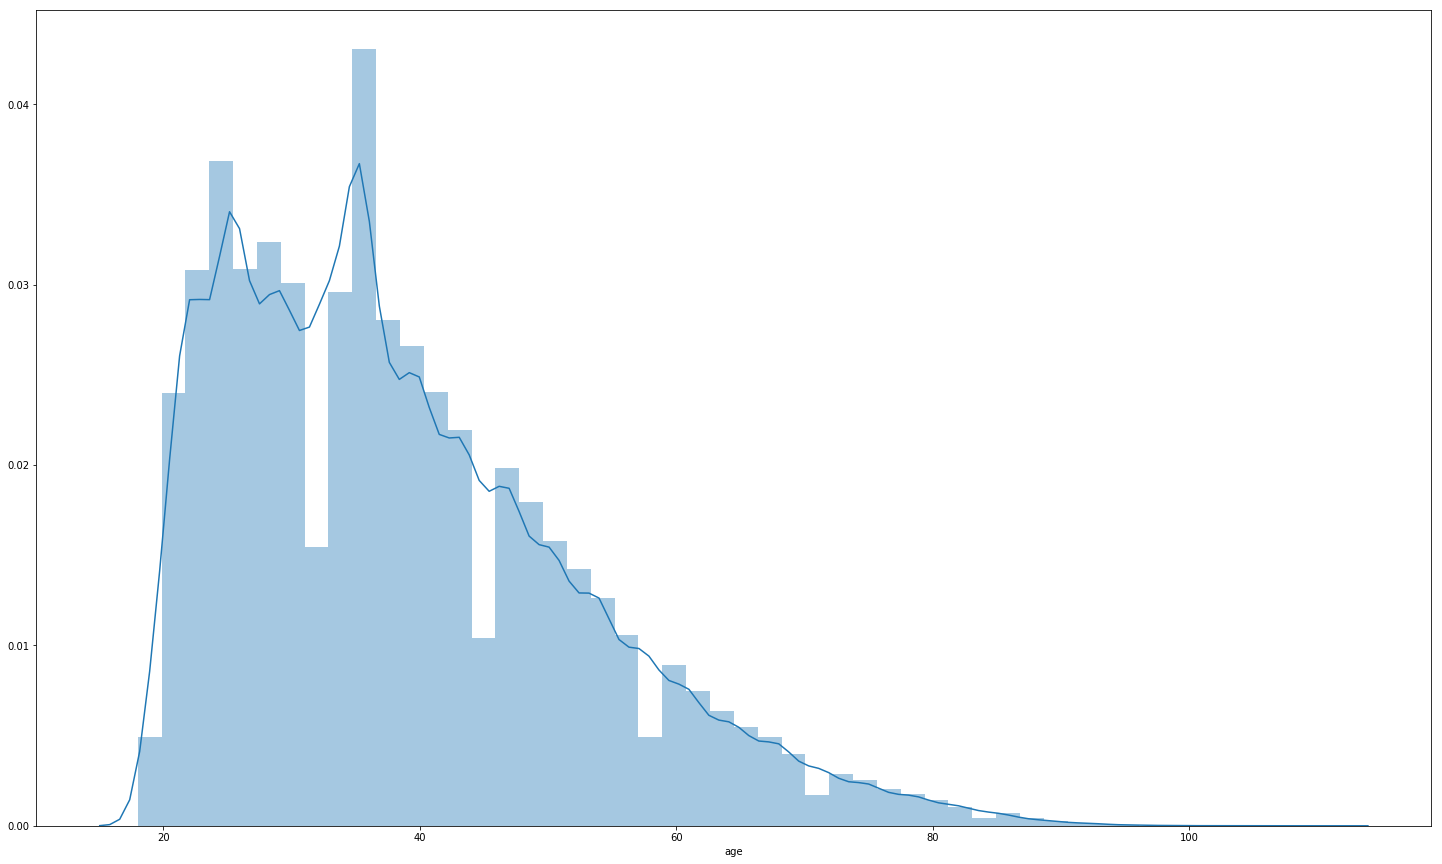

In [87]:
plt.figure(figsize=(25,15))
sns.distplot(data['age']);

The '**age**' distribution is skewed to the right.

#### Channel and Previous

In [88]:
data.dtypes

age                       float64
channel                    object
customerID                 object
externalScore             float64
indBadDebt                  int64
indBadLocation              int64
indCreditBureau             int64
indInternet                 int64
indSimin                    int64
indXlist                    int64
numLoans                   object
numMortgages               object
previous                   object
salary                     object
sex                        object
status                     object
sumExternalDefault        float64
target                    float64
binned_externalScore       object
binned_ExternalDefault    float64
dtype: object

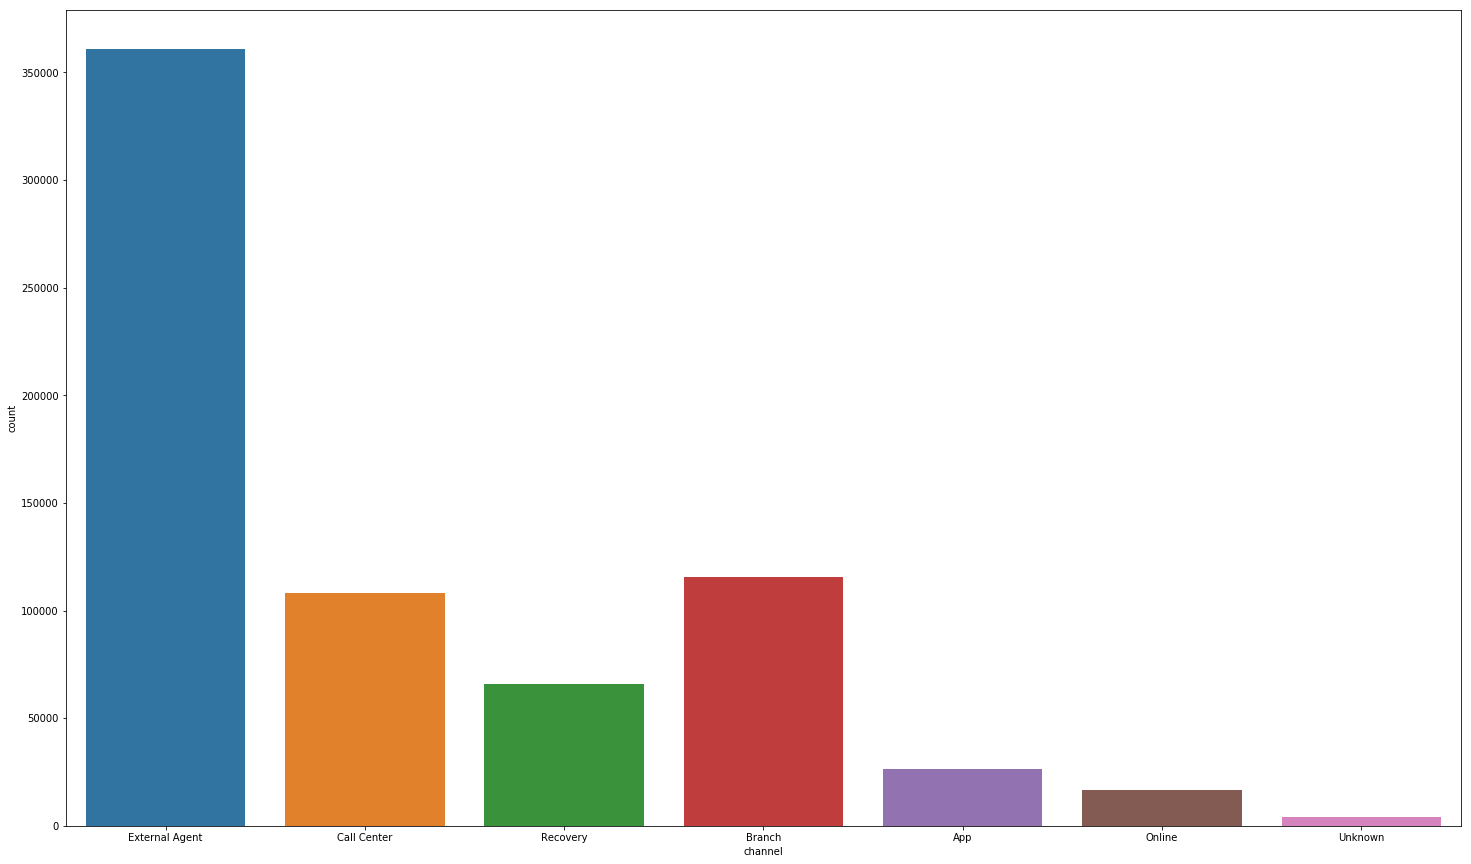

In [89]:
plt.figure(figsize=(25,15))
sns.countplot(data['channel']);

In [90]:
Counter(data['channel'])

Counter({'External Agent': 360708,
         'Call Center': 108113,
         'Recovery': 65771,
         'Branch': 115505,
         'App': 26548,
         'Online': 16523,
         'Unknown': 4084})

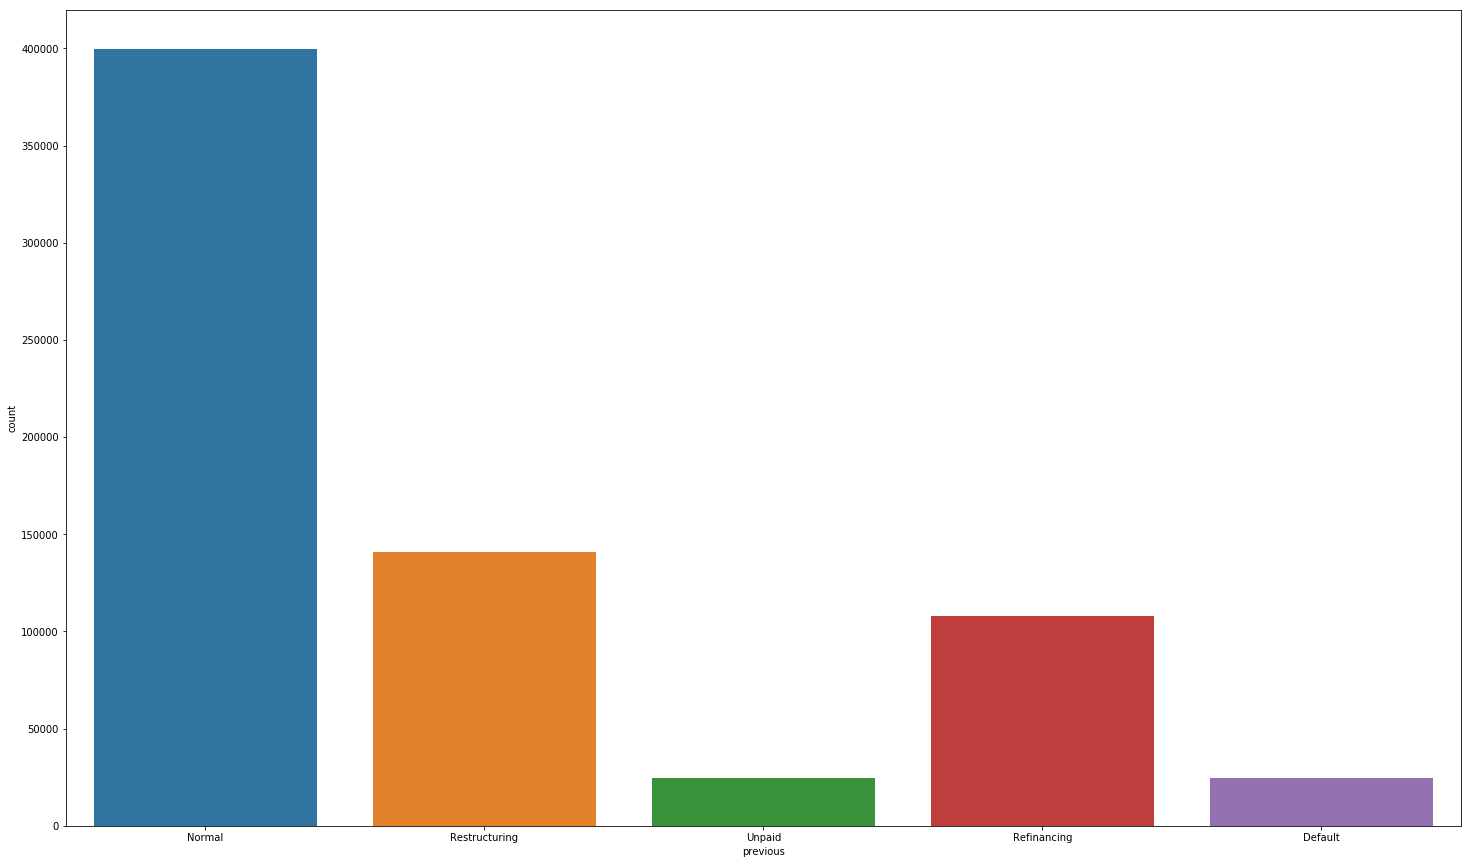

In [91]:
plt.figure(figsize=(25,15))
sns.countplot(data['previous']);

In [92]:
Counter(data['previous'])

Counter({'Normal': 399544,
         'Restructuring': 140851,
         'Unpaid': 24506,
         'Refinancing': 107755,
         'Default': 24596})

#### CustomerID

In [93]:
data['customerID'].describe()

count            697252
unique           677786
top       R_10406101156
freq                 17
Name: customerID, dtype: object

With the duplicates on the variable **customerID**, I will create a new feature called **2_or_more_acc**. Since if a customer that has multiple accounts has the same probability of default in all of them.

In [94]:
data["2_or_more_acc"] = (data['customerID'].duplicated()).astype(int)
data.shape

(697252, 21)

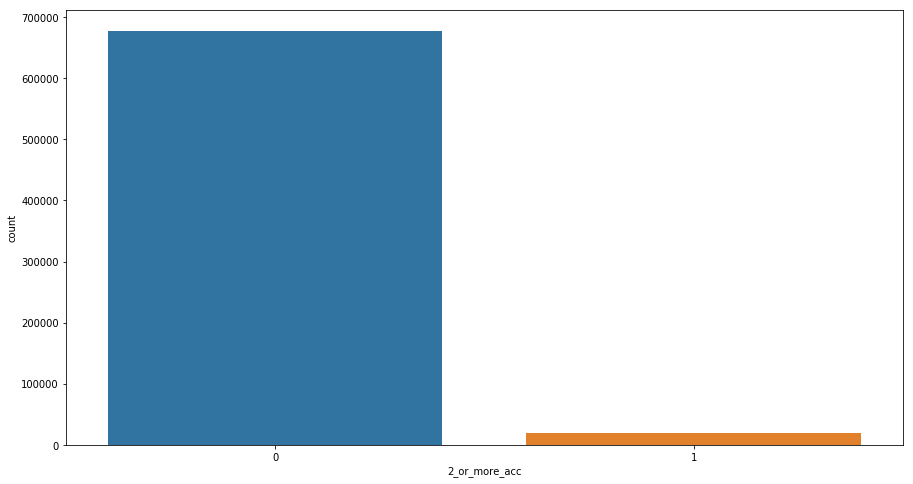

In [95]:
plt.figure(figsize=(15,8))
sns.countplot(data["2_or_more_acc"]);

In [96]:
Counter(data["2_or_more_acc"])

Counter({0: 677786, 1: 19466})

19466 accounts correspond to already existing customers.

#### Other binnary variables

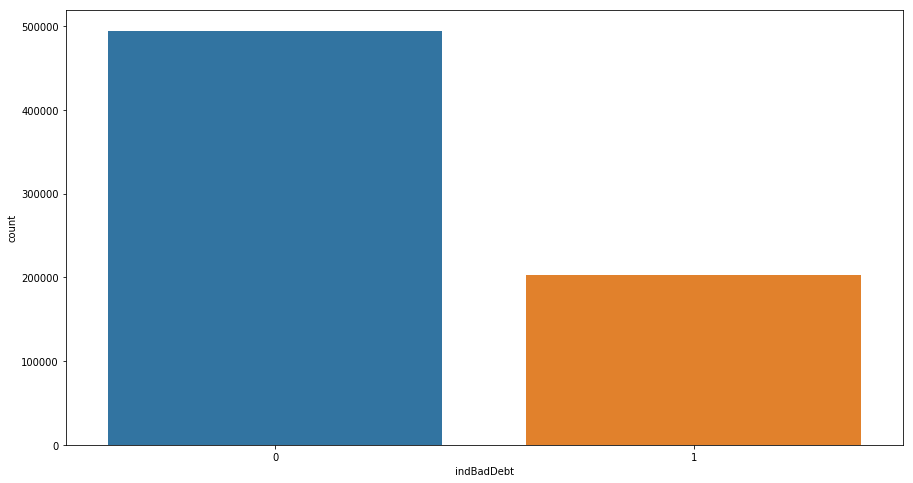

In [97]:
plt.figure(figsize=(15,8))
sns.countplot(data["indBadDebt"]);

In [98]:
Counter(data['indBadDebt'])

Counter({1: 202733, 0: 494519})

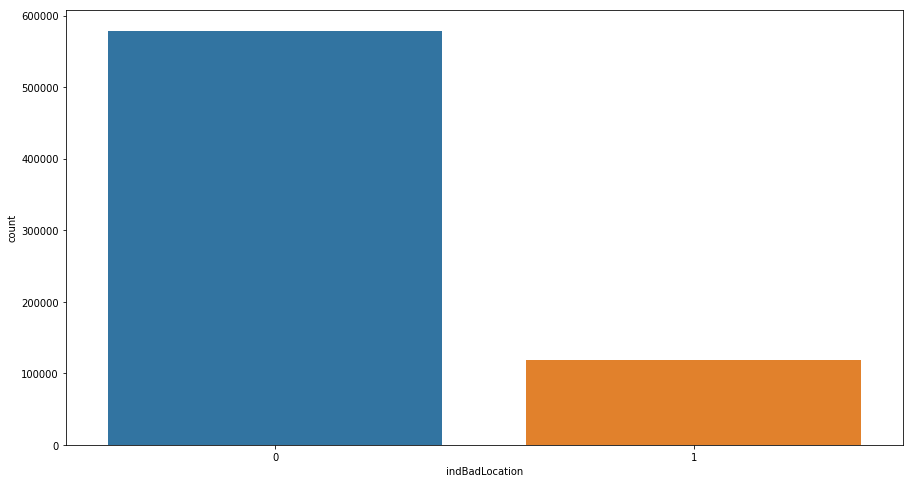

In [99]:
plt.figure(figsize=(15,8))
sns.countplot(data["indBadLocation"]);

In [100]:
Counter(data['indBadLocation'])

Counter({0: 579035, 1: 118217})

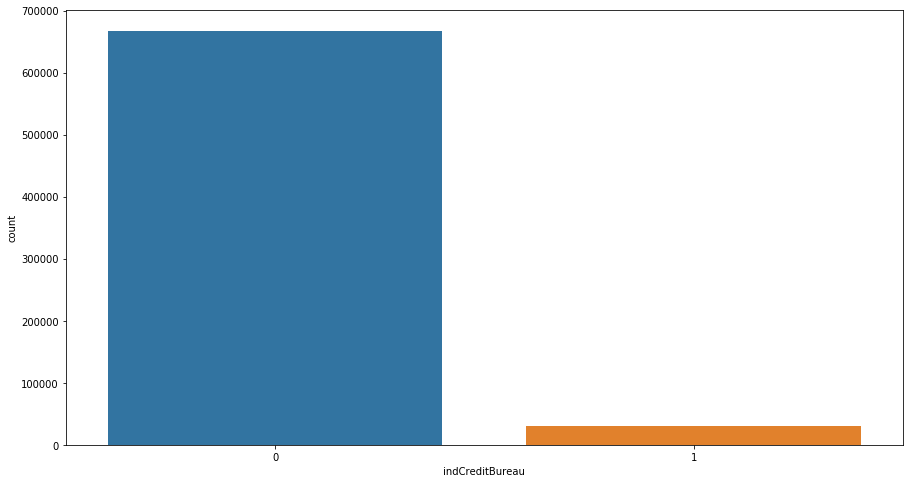

In [101]:
plt.figure(figsize=(15,8))
sns.countplot(data["indCreditBureau"]);

In [102]:
Counter(data['indCreditBureau'])

Counter({0: 667708, 1: 29544})

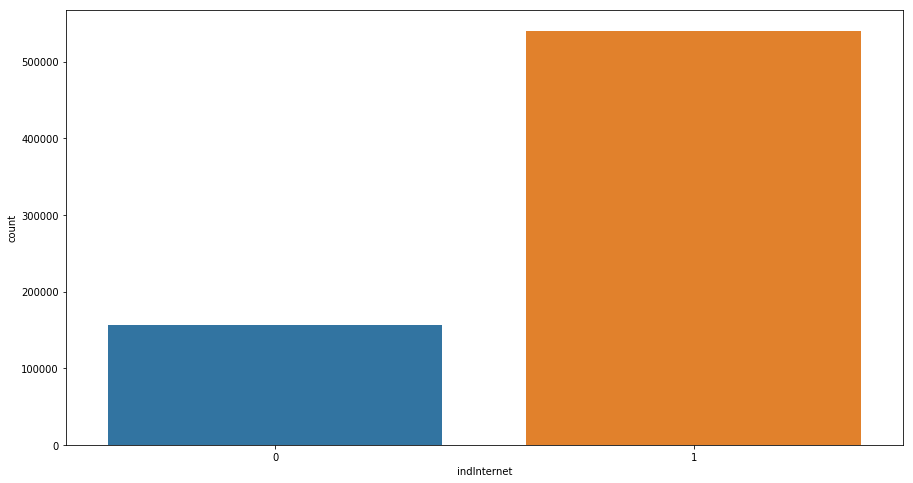

In [103]:
plt.figure(figsize=(15,8))
sns.countplot(data["indInternet"]);

In [104]:
Counter(data['indInternet'])

Counter({1: 540395, 0: 156857})

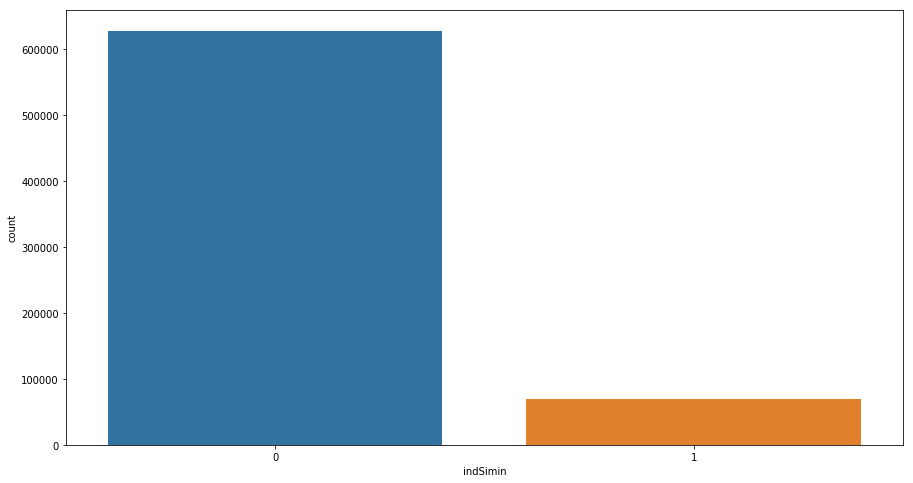

In [105]:
plt.figure(figsize=(15,8))
sns.countplot(data["indSimin"]);

In [106]:
Counter(data['indSimin'])

Counter({0: 628378, 1: 68874})

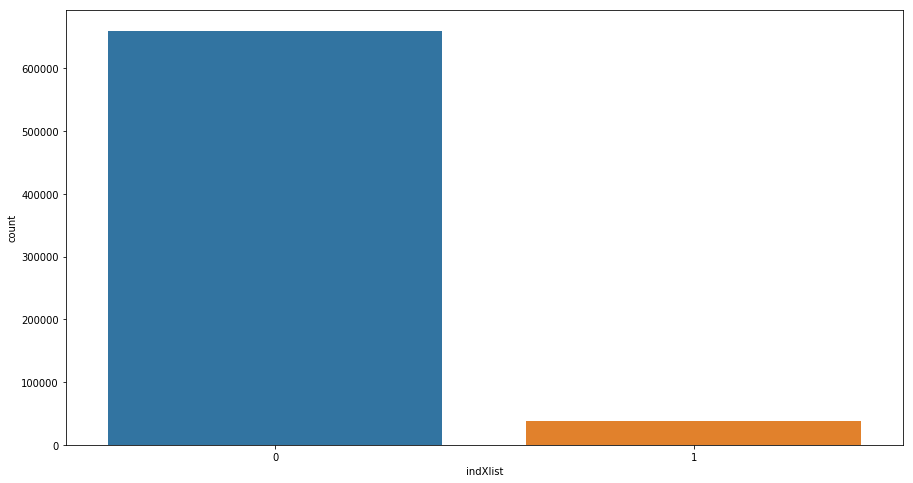

In [107]:
plt.figure(figsize=(15,8))
sns.countplot(data["indXlist"]);

In [108]:
Counter(data['indXlist'])

Counter({0: 659859, 1: 37393})

I tried to both sum and average the 'negative' binnary variables in new features called **sum_binnay** and **avg_binnary**. However a decrease in the accuracy of the later models was spoted.

In [109]:
# data['sum_binnary'] = (data['indXlist'] + data['indSimin'] + data['indCreditBureau'] + data['indBadLocation'] + data['indBadDebt'])

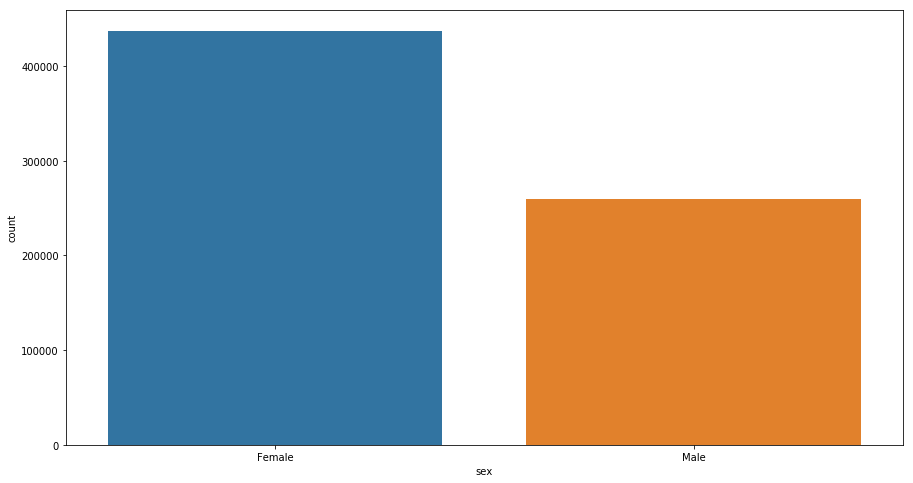

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(data["sex"]);

In [111]:
Counter(data['sex'])

Counter({'Female': 437524, 'Male': 259728})

I do not want to binnarize the variable sex because it will add multicolinearity to the models. This is why I will transform the factors to **0** and **1**.

In [112]:
data['sex'][data['sex'] == 'Female'] = 0 
data['sex'][data['sex'] == 'Male'] = 1

#### Salary

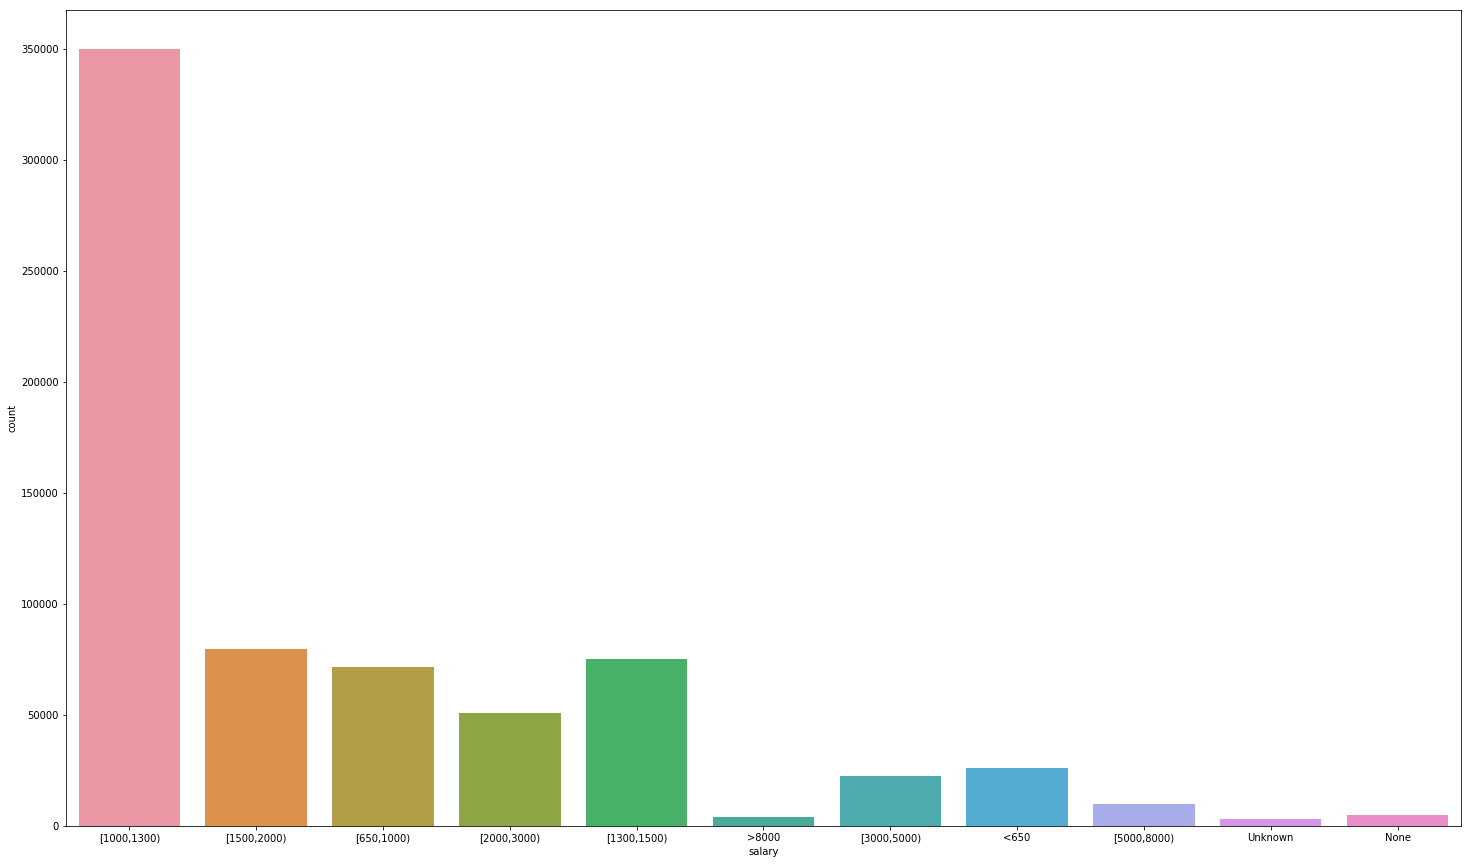

In [113]:
plt.figure(figsize=(25,15))
sns.countplot(data["salary"]);

In [114]:
Counter(data['salary'])

Counter({'[1000,1300)': 349734,
         '[1500,2000)': 79699,
         '[650,1000)': 71473,
         '[2000,3000)': 50983,
         '[1300,1500)': 75020,
         '>8000': 4097,
         '[3000,5000)': 22538,
         '<650': 26210,
         '[5000,8000)': 9594,
         'Unknown': 3237,
         'None': 4667})

It comes in form of a range, I will translate the factors to a continuous variable to help the model perform better.

In [115]:
data['salary'][data['salary'] == 'Unknown'] = 0
data['salary'][data['salary'] == 'None'] = 0
data['salary'][data['salary'] == '<650'] = 350
data['salary'][data['salary'] == '[650,1000)'] = 850
data['salary'][data['salary'] == '[1000,1300)'] = 1200
data['salary'][data['salary'] == '[1300,1500)'] = 1400
data['salary'][data['salary'] == '[1500,2000)'] = 1750
data['salary'][data['salary'] == '[2000,3000)'] = 2500
data['salary'][data['salary'] == '[3000,5000)'] = 4000
data['salary'][data['salary'] == '[5000,8000)'] = 6500
data['salary'][data['salary'] == '>8000'] = 9000

#### Status

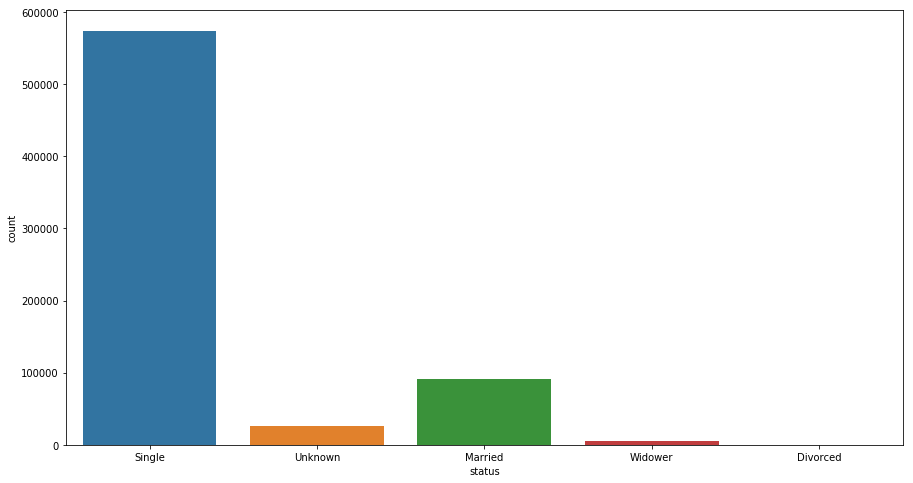

In [116]:
plt.figure(figsize=(15,8))
sns.countplot(data["status"]);

In [117]:
Counter(data['status'])

Counter({'Single': 574387,
         'Unknown': 26618,
         'Married': 90790,
         'Widower': 5080,
         'Divorced': 377})

Make sure there are no NA's left.

In [118]:
data.isnull().sum()

age                            0
channel                        0
customerID                     0
externalScore              11070
indBadDebt                     0
indBadLocation                 0
indCreditBureau                0
indInternet                    0
indSimin                       0
indXlist                       0
numLoans                       0
numMortgages                   0
previous                       0
salary                         0
sex                            0
status                         0
sumExternalDefault          3554
target                    174313
binned_externalScore           0
binned_ExternalDefault         0
2_or_more_acc                  0
dtype: int64

I will now delete the variables that are either redundant or the ones that will not be used for the algorithms in the next document.

In [119]:
del data['externalScore']
del data['sumExternalDefault']
del data['customerID']

I will try to run the model without the variables **numMortgages** and **numLoans** due to their high volume of NA's.
I also run teh models with a new variable called **total_products** that was the sum of mortgages and loans. In both instances the performance was worst.

In [120]:
#del data['numMortgages']
#del data['numLoans']

### Save Clean Dataset

In [121]:
data.to_csv("cleaned_data.csv", index = False)

[![https://gyazo.com/06af30d139acc85d8f009ed84d8ae49a](https://i.gyazo.com/06af30d139acc85d8f009ed84d8ae49a.png)](https://gyazo.com/06af30d139acc85d8f009ed84d8ae49a)